# **Project Title: Credit Card Fraud Detection**

**Problem Statement:**

With the increasing prevalence of online transactions, ensuring the security of credit card transactions is very important. The objective of this project is to develop a robust machine learning model capable of accurately detecting fraudulent credit card transactions in real-time. Utilizing a dataset containing transaction details such as transaction amount, merchant category, cardholder information, transaction location, the aim is to build a predictive model that can effectively differentiate between legitimate and fraudulent transactions. By employing advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this project seeks to contribute to the development of proactive measures for securing credit card transactions and safeguarding the financial interests of stakeholders in the digital economy.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv')
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
# Information about data
df.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
# Summary Description for numerical data
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [ ]:
# Check column names
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
# Check rows and columns size
df.shape

(5000, 15)

In [ ]:
# Check Missing Values
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

## **1) Exploratory Data Analysis (EDA):**

a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category,
Location, etc.

In [ ]:
# Categorical columns
categorical_columns  = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop(['Transaction_ID','Transaction_DateTime'])
categorical_columns

Index(['Card_Type', 'Merchant_Category', 'Location', 'Region',
       'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

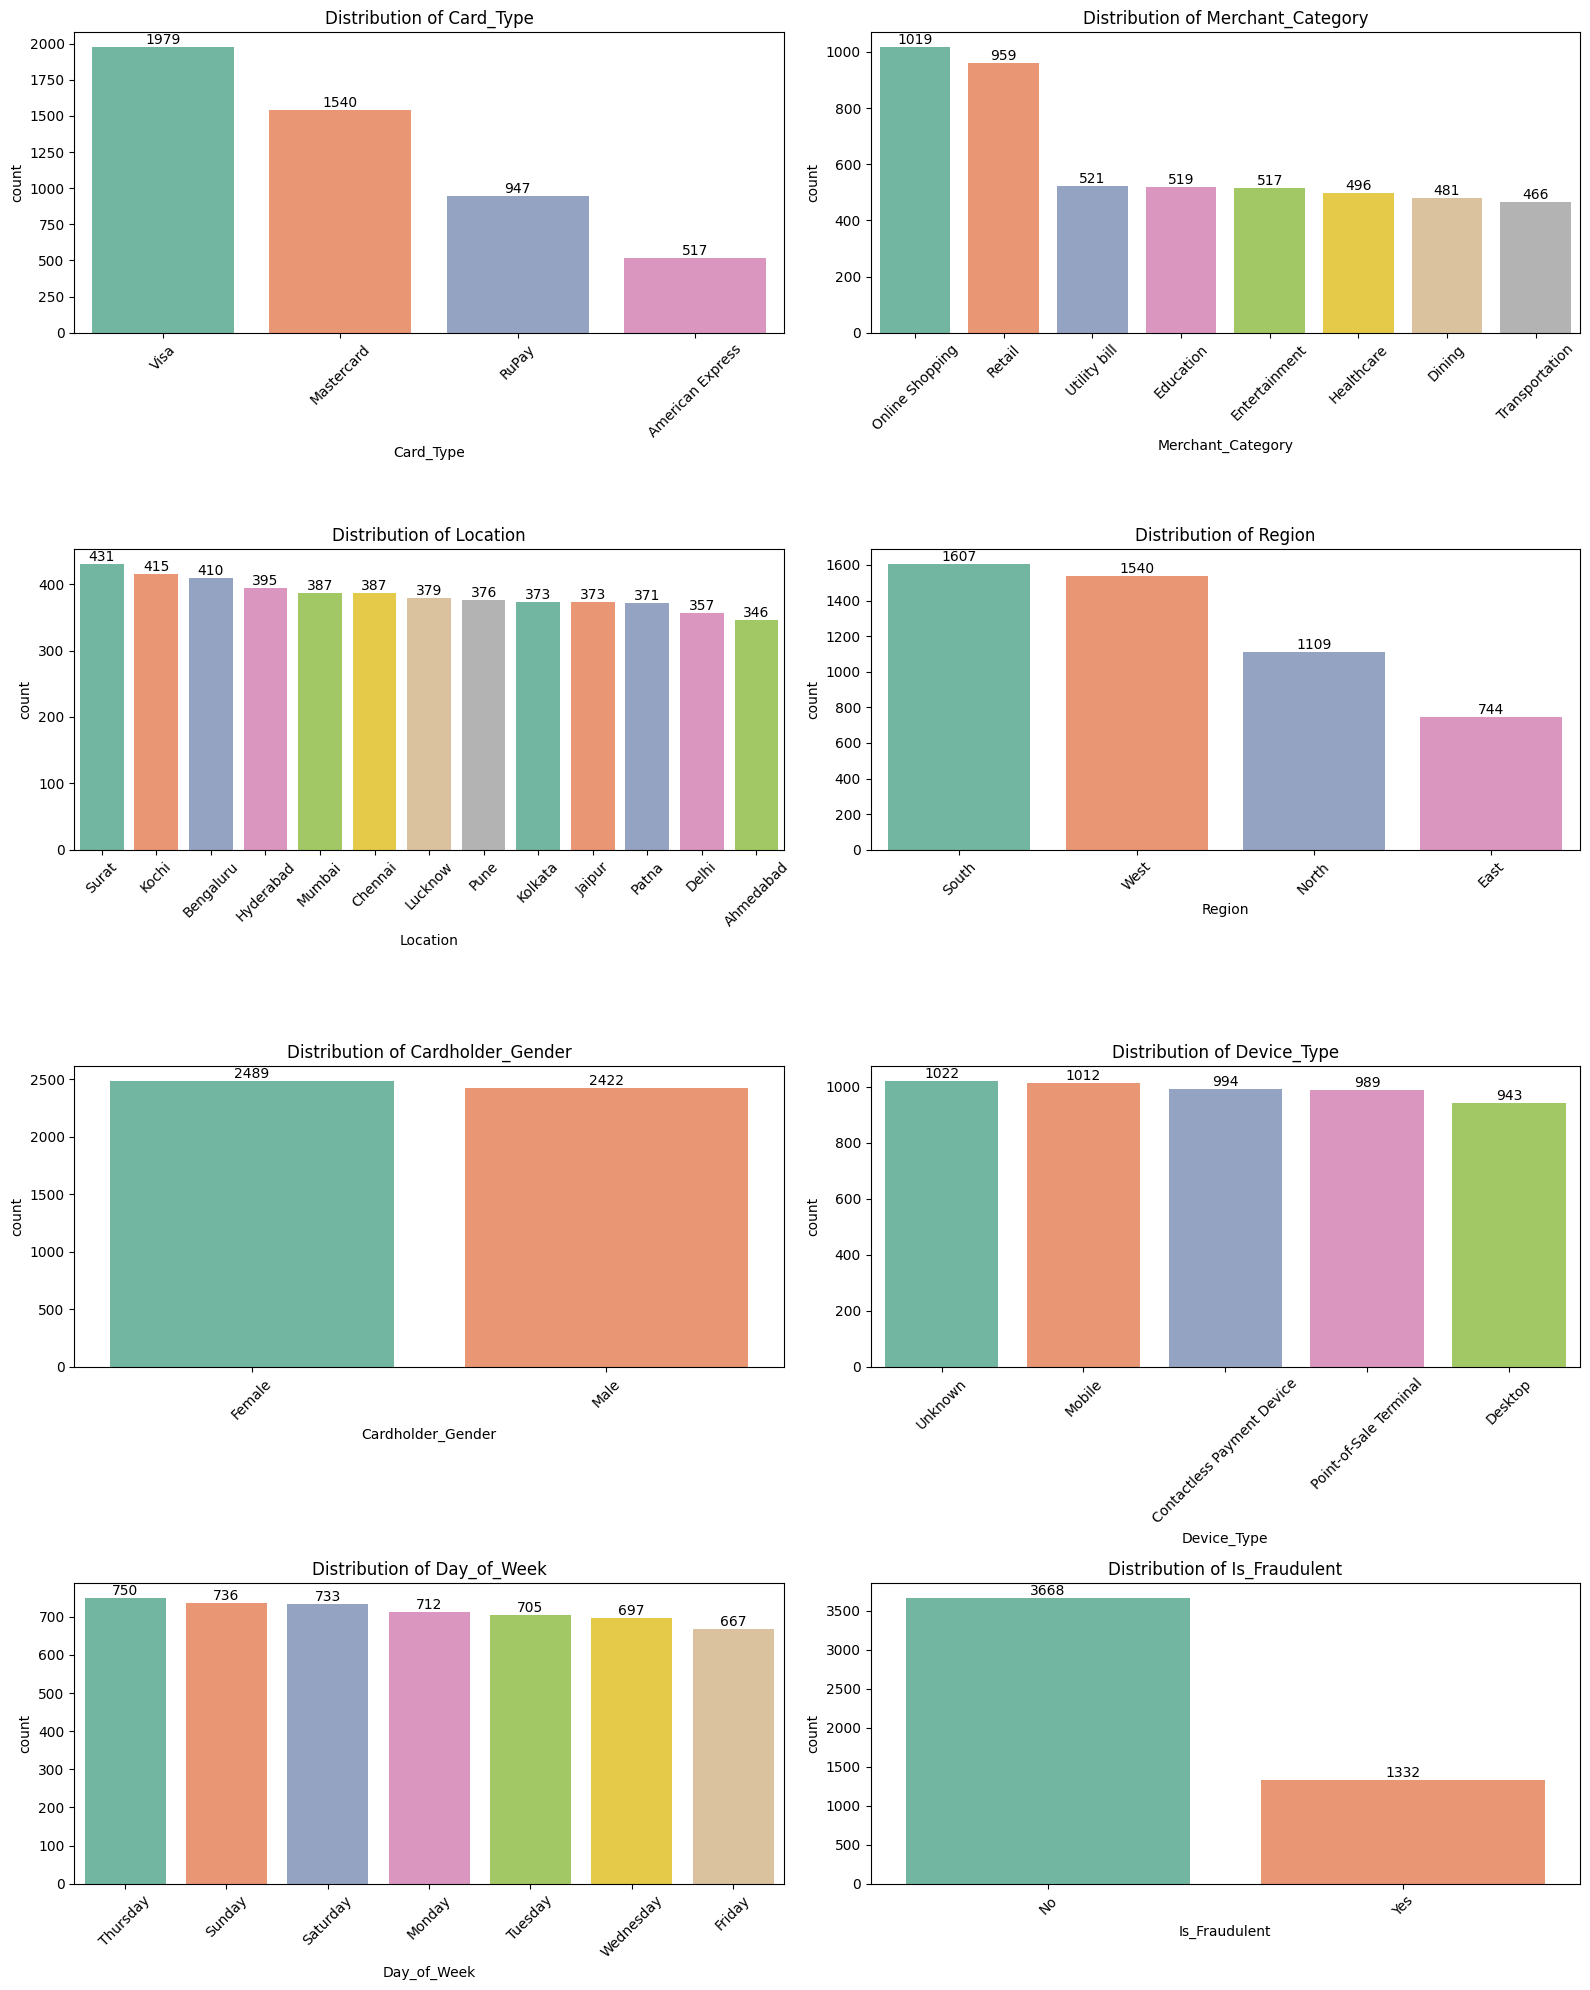

In [ ]:
# Distribution of Categorical features Using Count Plot
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i+1)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.tight_layout()

b) Explore numerical features like Transaction_Amount, Cardholder_Age,
Cardholder_Monthly_Income, and Cardholder_Average_Spend. Use descriptive statistics to
understand their central tendency and spread.

In [ ]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit'],
      dtype='object')

In [ ]:
# Summary Description for numerical data
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,4994.0,74667.995995,43089.045623,25008.00,39742.5000,60922.000,98373.5000,199923.00
Cardholder_Age,4865.0,49.106680,18.398524,18.00,33.0000,49.000,65.0000,80.00
Cardholder_Monthly_Income,4686.0,137353.817542,69471.623020,35005.00,73485.0000,131833.000,189054.2500,299907.00
Cardholder_Average_Spend,4792.0,63058.343566,40056.989704,10282.41,33336.7425,49547.945,83732.3525,199898.29
Credit_Limit,4991.0,124654.377880,55668.246494,50000.00,100000.0000,100000.000,150000.0000,200000.00


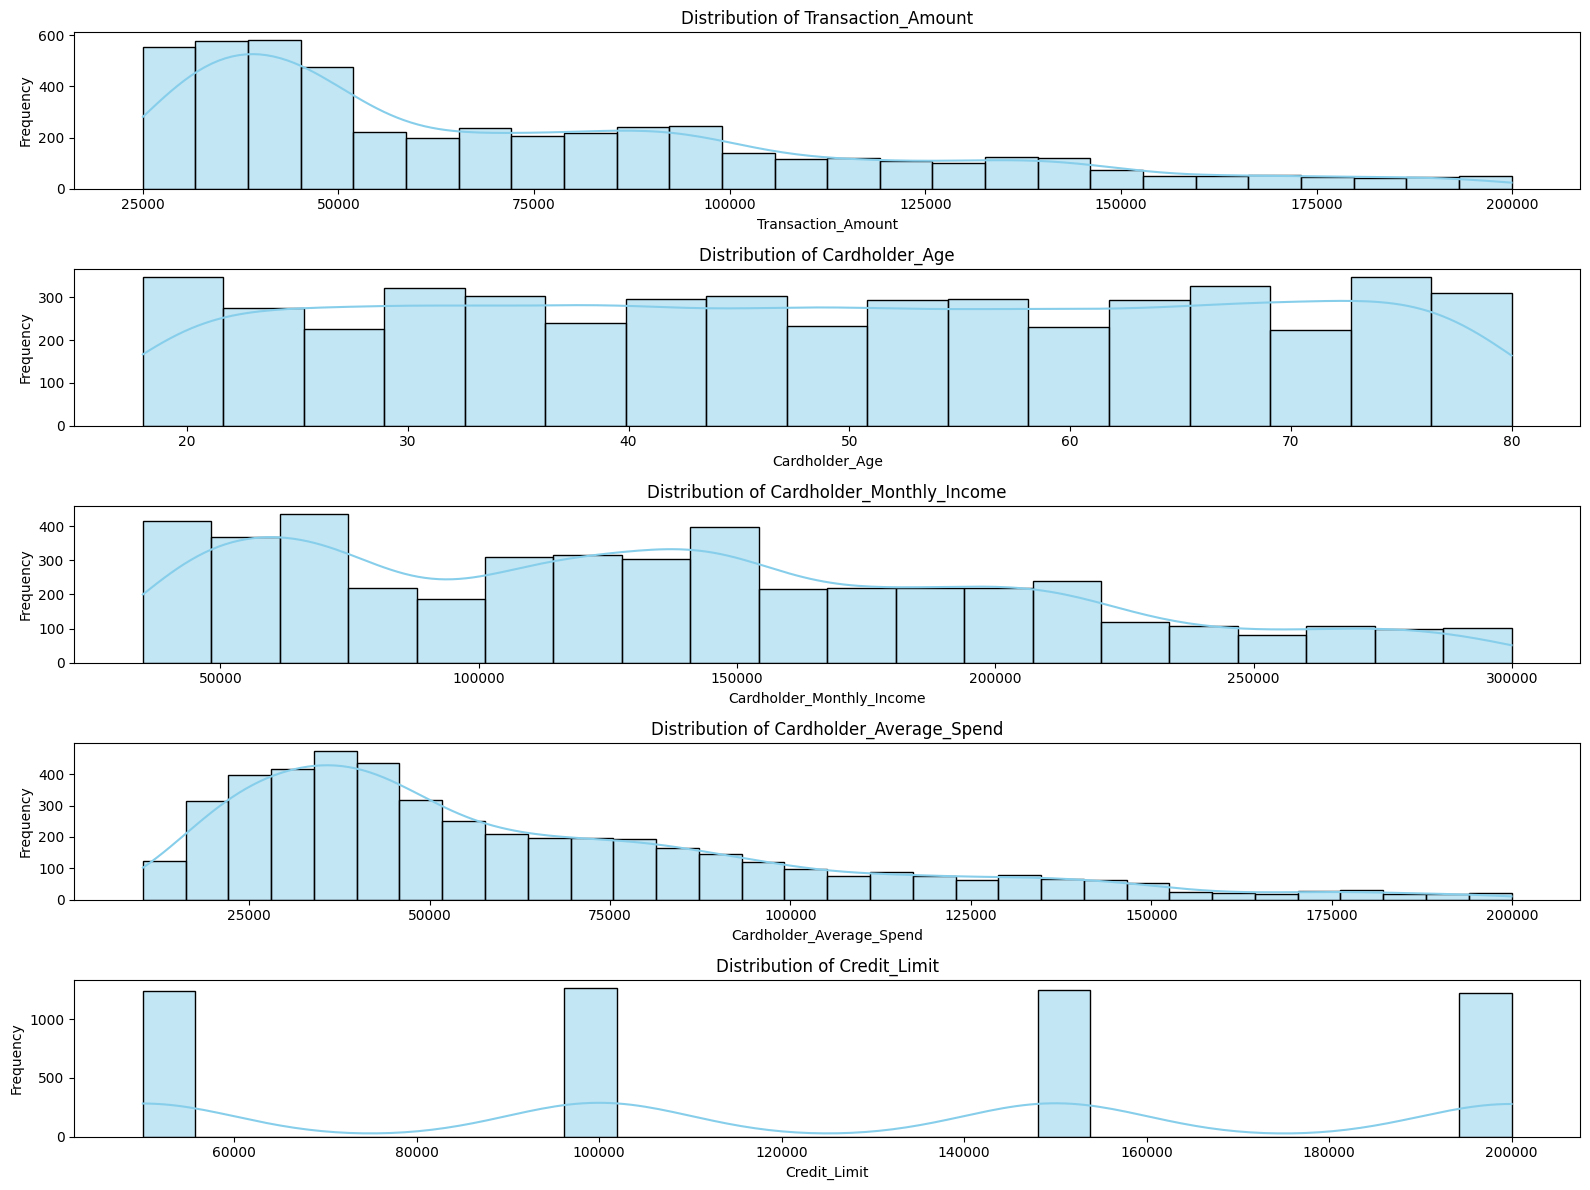

In [ ]:
#  Histograms for Distribution
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 1, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

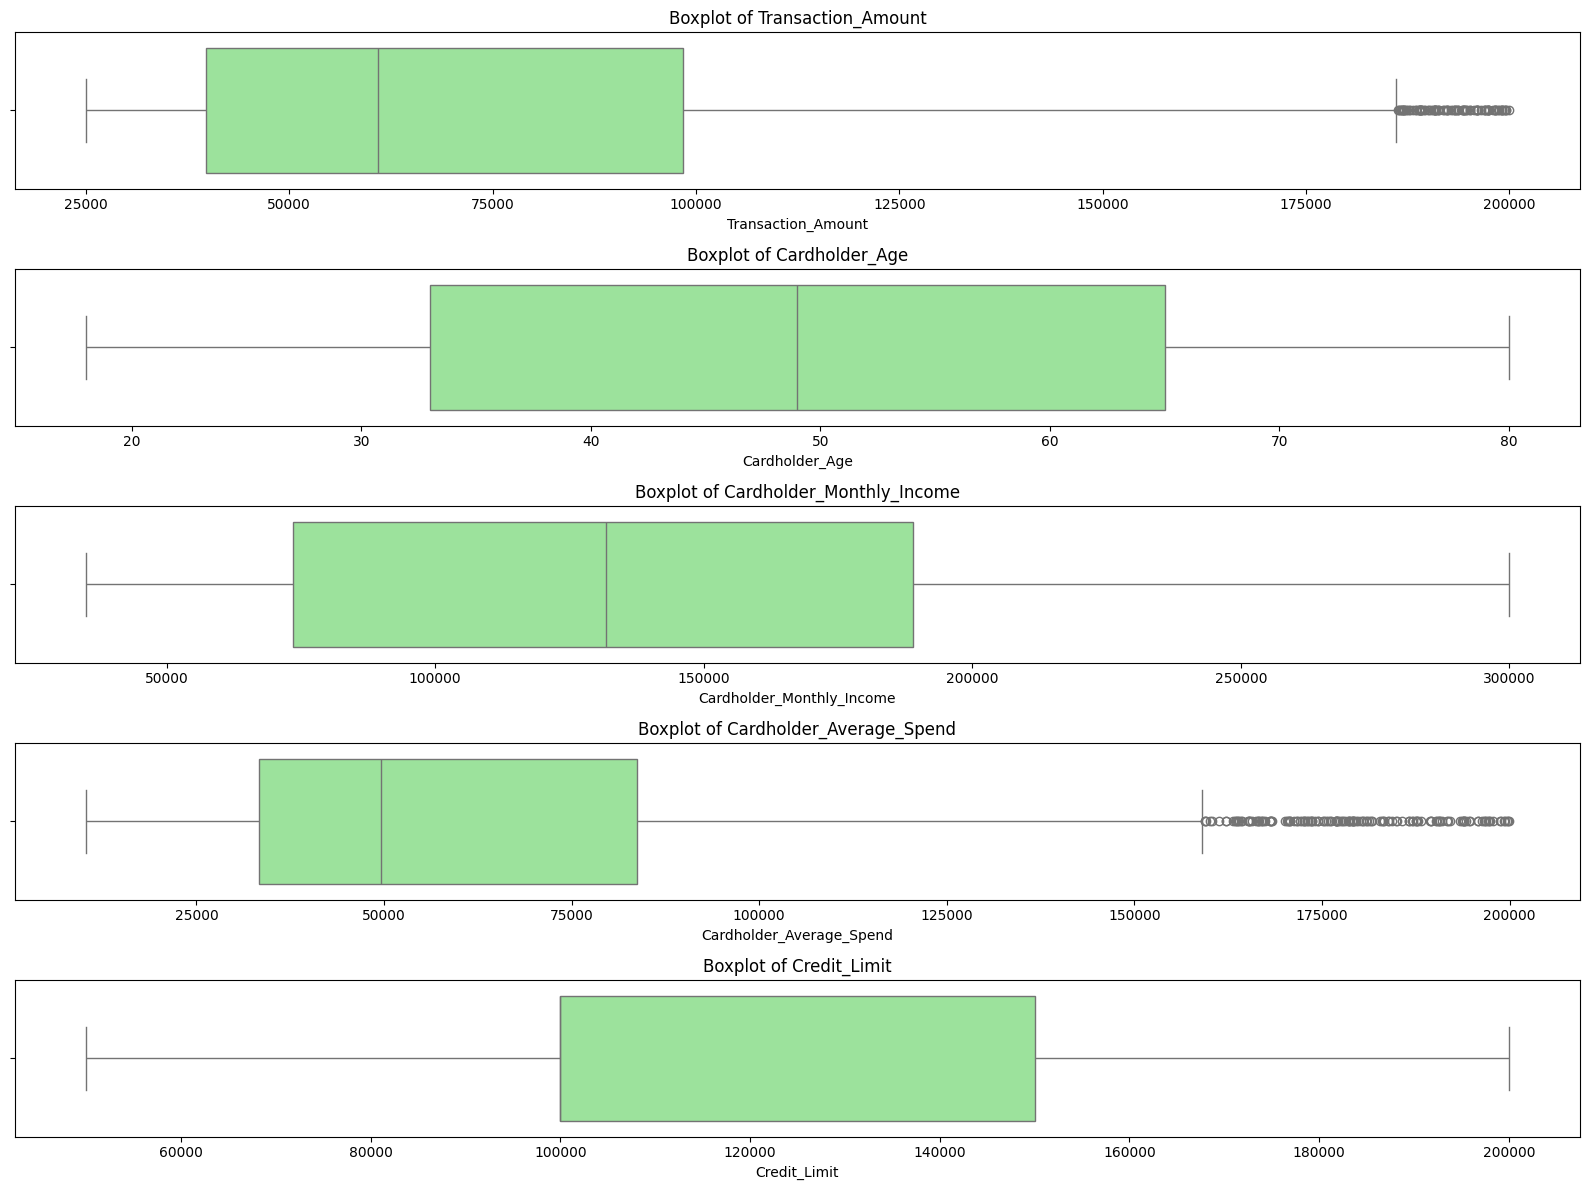

In [ ]:
# Boxplots for Outliers and Spread
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 1, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

c) Conduct bivariate and multivariate analysis to identify potential relationships between the
features as well as with the target variable (Is_Fraudulent).

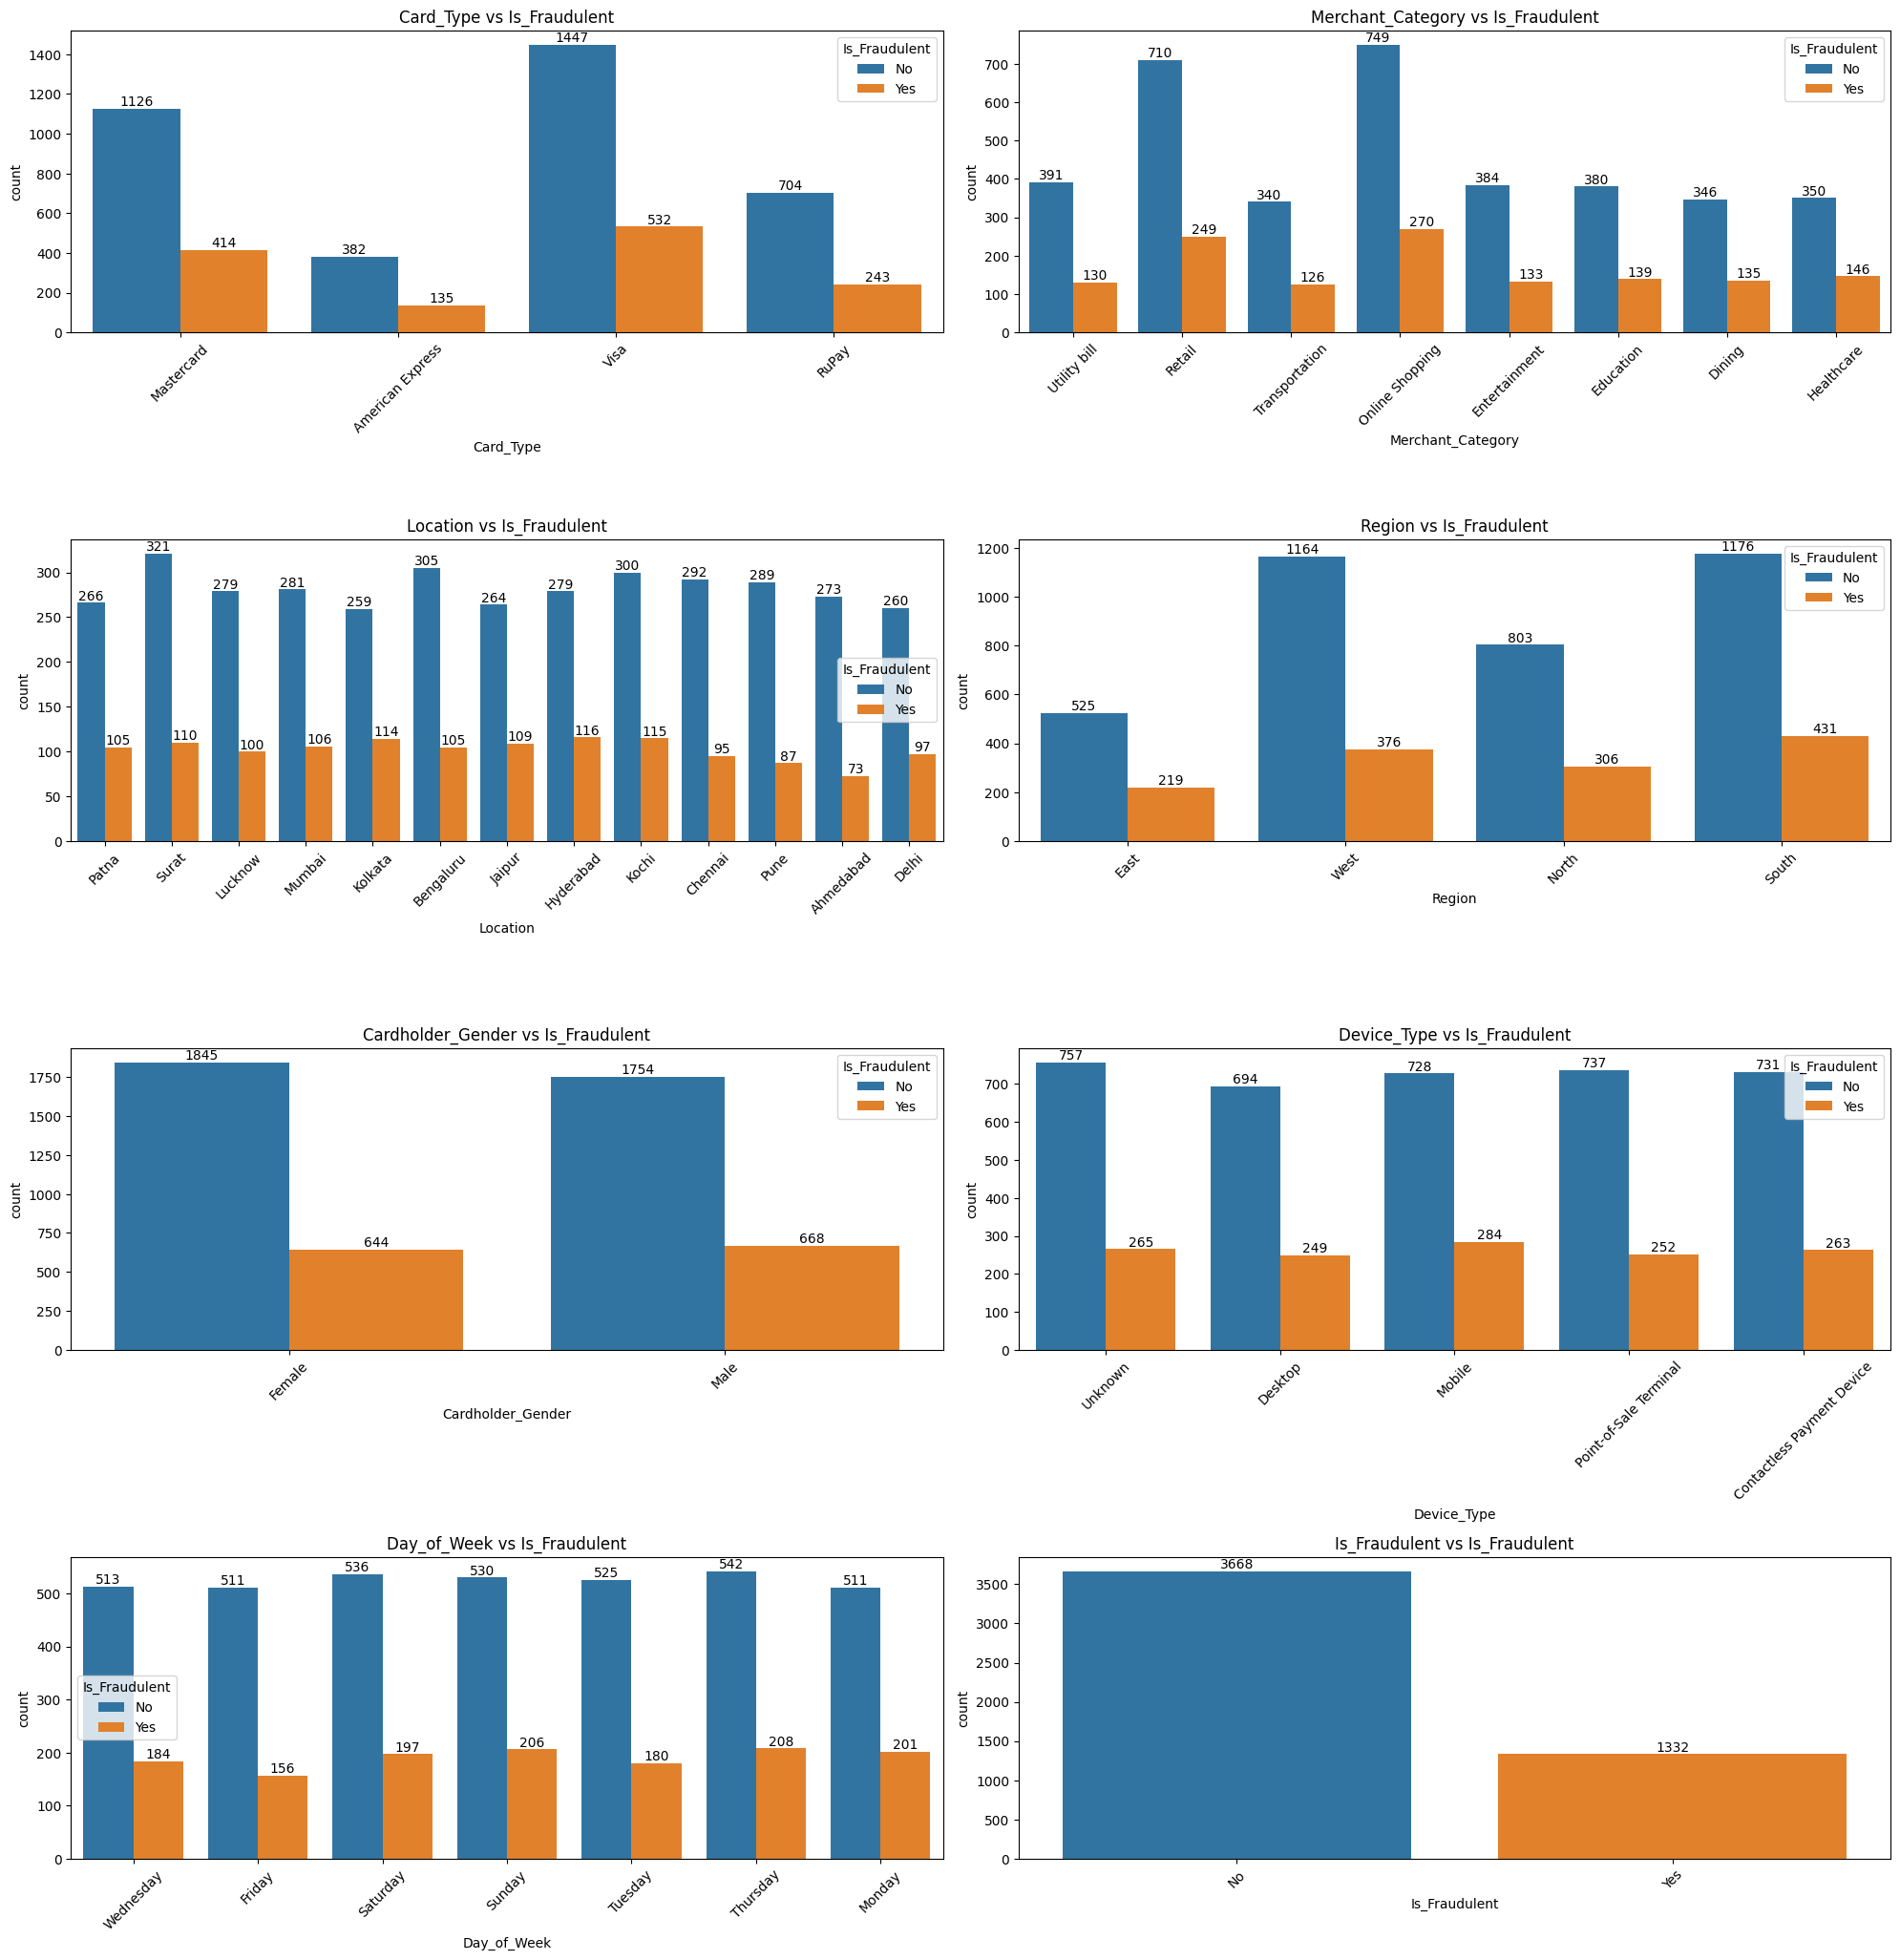

In [ ]:
#  Bivariate Analysis For Categorical Features
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 2, i+1)
    ax = sns.countplot(data=df, x=col, hue='Is_Fraudulent')
    for container in ax.containers:
      ax.bar_label(container)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.xticks(rotation=45)
    plt.tight_layout()

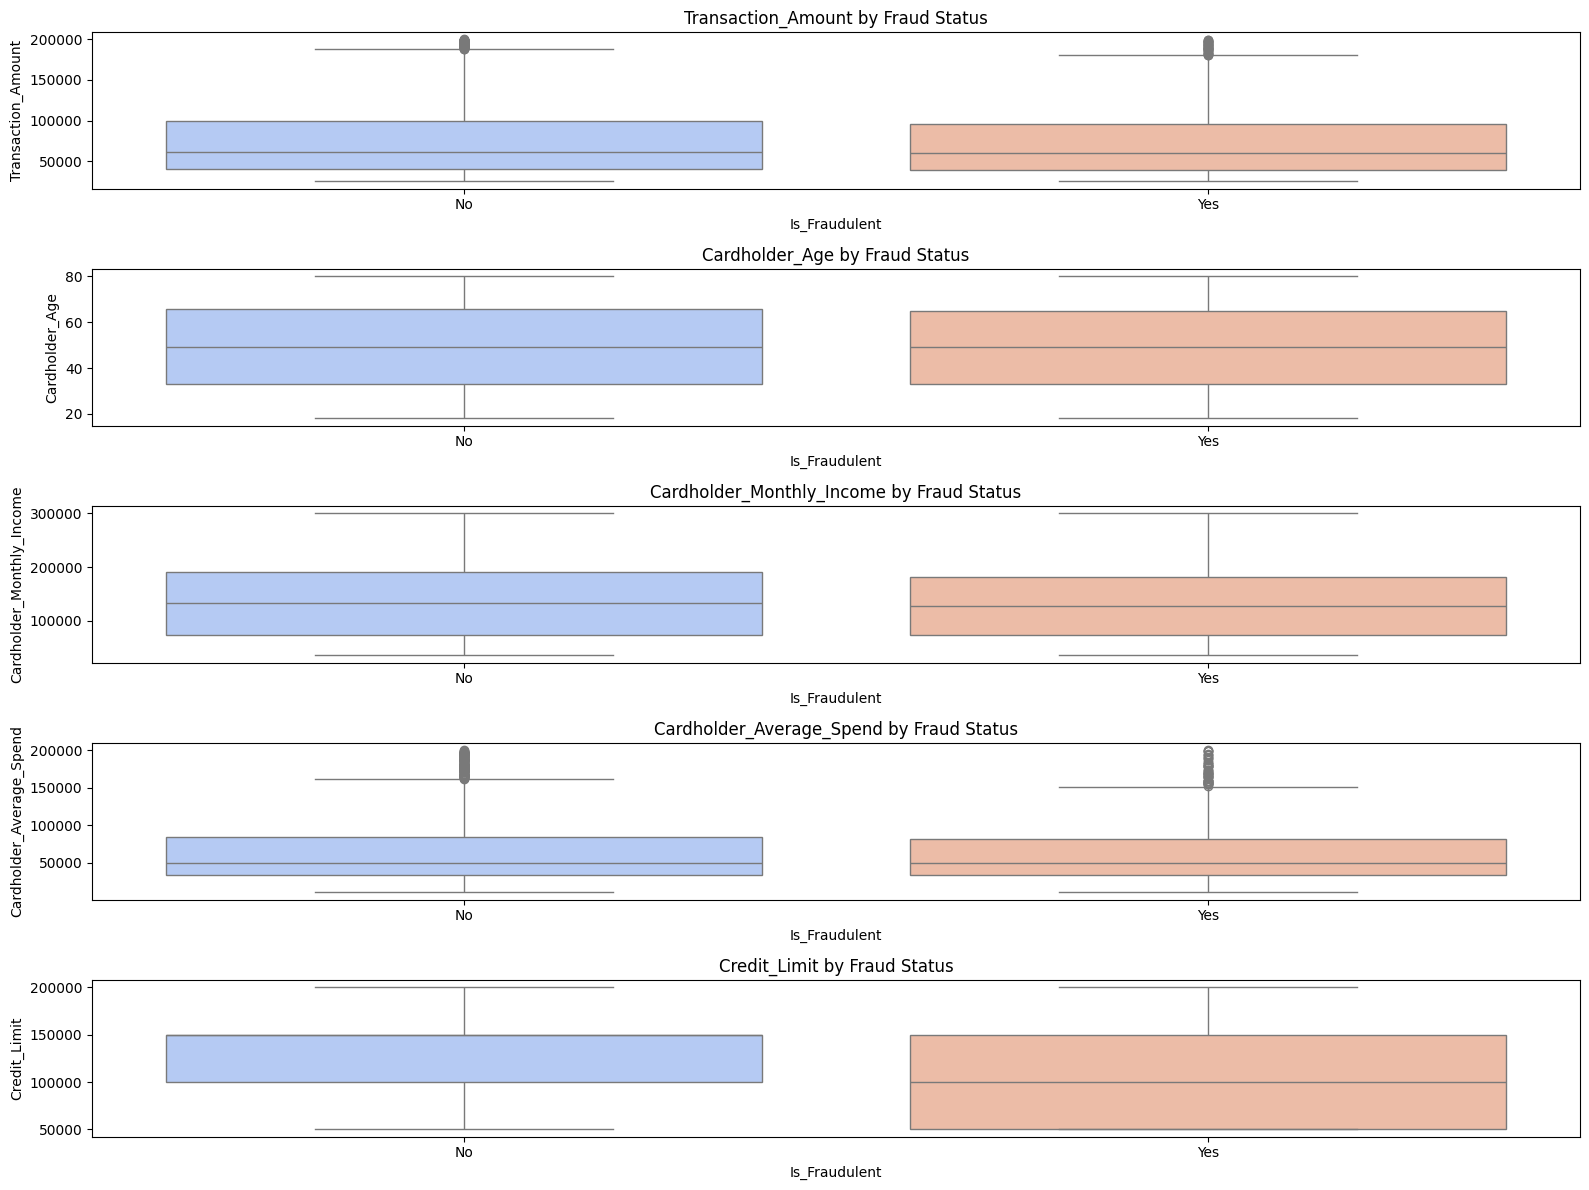

In [ ]:
# Bivariate Analysis For Numerical Features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 1, i+1)
    sns.boxplot(data=df, x='Is_Fraudulent', y=col, palette='coolwarm')
    plt.title(f'{col} by Fraud Status')
    plt.tight_layout()


In [ ]:
# Group by for Is_Fraudulent in all numerical_columns mean value
df.groupby('Is_Fraudulent')[numerical_columns].mean().T

Is_Fraudulent,No,Yes
Transaction_Amount,75172.616580,73273.539563
Cardholder_Age,49.140577,49.013138
Cardholder_Monthly_Income,138128.568268,135226.504396
Cardholder_Average_Spend,63381.584970,62172.394645
Credit_Limit,125088.773559,123458.646617


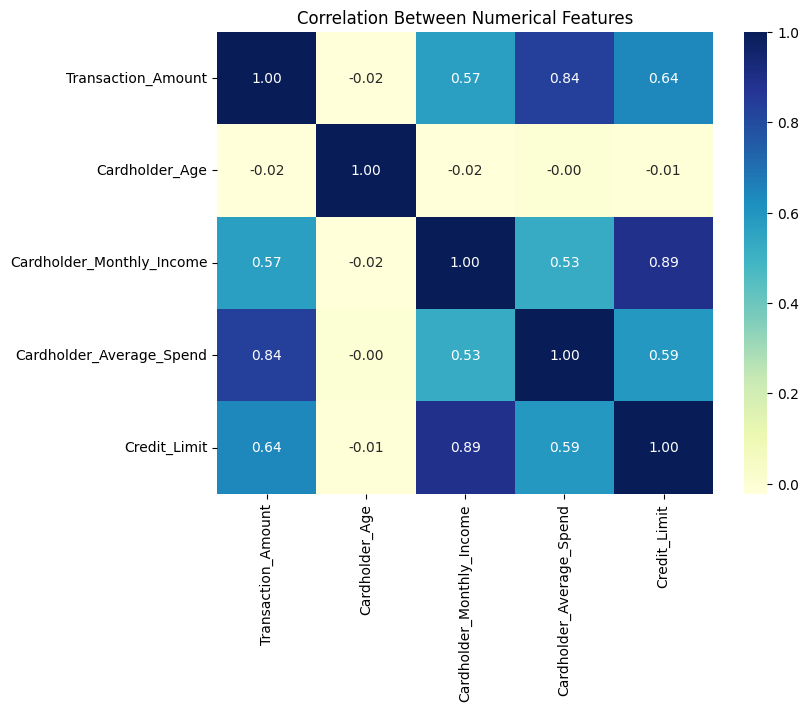

In [ ]:
#  Multivariate Analysis For Correlation Between Numerical Features
corr = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Between Numerical Features")
plt.show()

d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent
transactions using histograms or box plots.

<ipython-input-187-a40e9a595aa1>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Is Fraudulent')


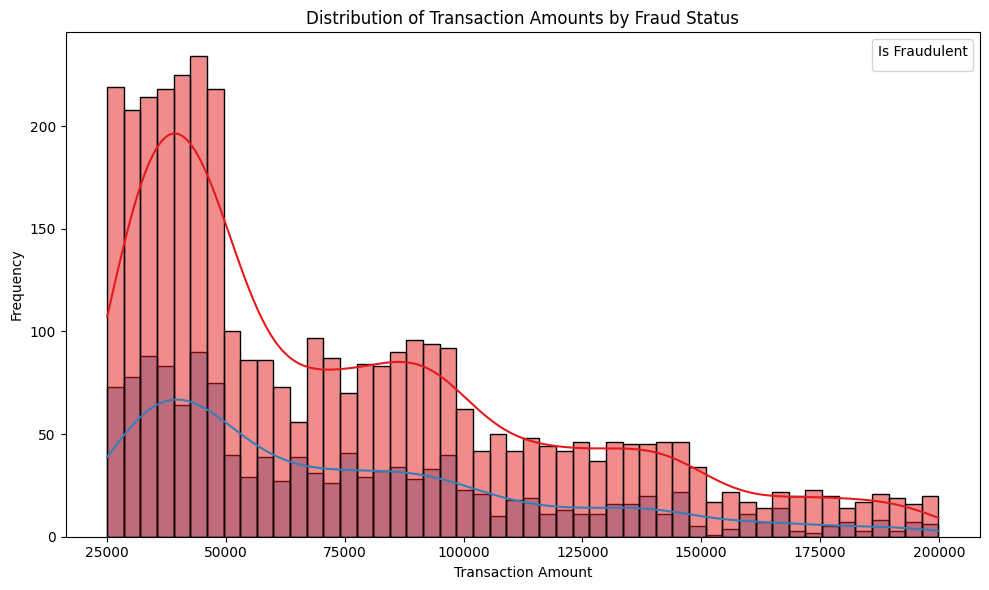

In [ ]:
# Histogram for Distribution of Transaction Amounts by Fraud Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', kde=True, palette='Set1', bins=50)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Is Fraudulent')
plt.tight_layout()
plt.show()

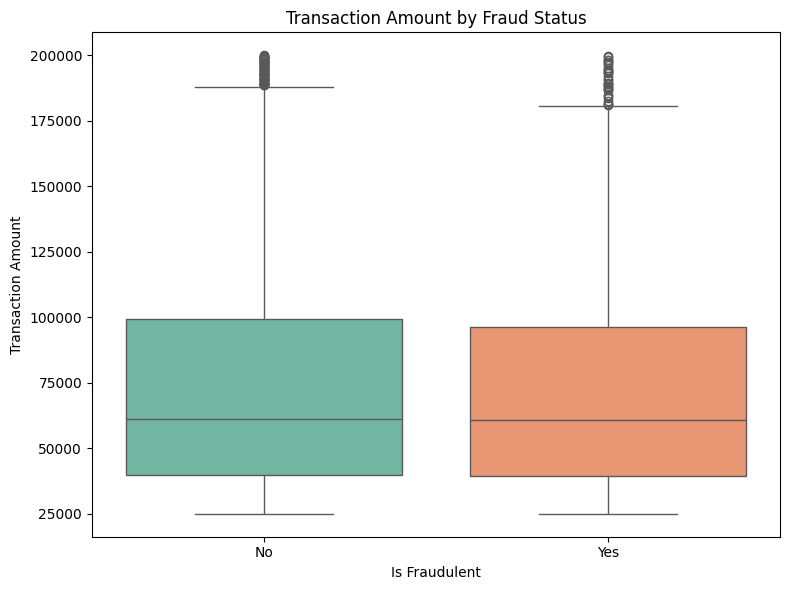

In [ ]:
# Box Plot for Transaction Amount by Fraud Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Is_Fraudulent', y='Transaction_Amount', palette='Set2')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraudulent')
plt.ylabel('Transaction Amount')
plt.tight_layout()

e) Investigate whether certain features are more susceptible to fraud.

In [ ]:
# Calculate the percentage of fraudulent
categorical_features=['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']
for feature in categorical_features:
    fraud_rate = pd.crosstab(df[feature], df['Is_Fraudulent'], normalize='index') * 100
    fraud_rate = fraud_rate.rename(columns={'Yes': 'Fraudulent (%)', 'No': 'Non-Fraudulent (%)'})
    print(f"\nFraud Rate by {feature}:\n", fraud_rate.round(2))



Fraud Rate by Card_Type:
 Is_Fraudulent     Non-Fraudulent (%)  Fraudulent (%)
Card_Type                                           
American Express               73.89           26.11
Mastercard                     73.12           26.88
RuPay                          74.34           25.66
Visa                           73.12           26.88

Fraud Rate by Merchant_Category:
 Is_Fraudulent      Non-Fraudulent (%)  Fraudulent (%)
Merchant_Category                                    
Dining                          71.93           28.07
Education                       73.22           26.78
Entertainment                   74.27           25.73
Healthcare                      70.56           29.44
Online Shopping                 73.50           26.50
Retail                          74.04           25.96
Transportation                  72.96           27.04
Utility bill                    75.05           24.95

Fraud Rate by Location:
 Is_Fraudulent  Non-Fraudulent (%)  Fraudulent (%)
Loca

##**2) Data Preprocessing - Data Cleaning:**

a) Handle missing values if any, using appropriate techniques such as KNNImputer; mean or
median imputation for numerical features, and mode imputation for categorical features.

In [ ]:
categorical_columns

Index(['Card_Type', 'Merchant_Category', 'Location', 'Region',
       'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
# Mode imputation for categorical columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
# Label Encoding to all categorical columns
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
# KNNImputer for numerical columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
df['Is_Fraudulent'] = df['Is_Fraudulent'].map({0: 'No', 1: 'Yes'})

In [ ]:
# After impute the missing values
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


b) Check for outliers in numerical features using statistical methods like Z-score or IQR
(Interquartile Range) and remove them if necessary to ensure data quality.

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, cols):
    numeric_cols = df[cols].select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        original_size = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Outliers - {col}: {original_size - df.shape[0]} rows removed")
    return df
# Apply the function
df = remove_outliers(df, numerical_cols)

Outliers - Transaction_ID: 0 rows removed
Outliers - Card_Type: 0 rows removed
Outliers - Merchant_Category: 0 rows removed
Outliers - Transaction_Amount: 96 rows removed
Outliers - Transaction_DateTime: 0 rows removed
Outliers - Location: 0 rows removed
Outliers - Region: 0 rows removed
Outliers - Cardholder_Age: 0 rows removed
Outliers - Cardholder_Gender: 0 rows removed
Outliers - Cardholder_Monthly_Income: 0 rows removed
Outliers - Cardholder_Average_Spend: 132 rows removed
Outliers - Credit_Limit: 0 rows removed
Outliers - Device_Type: 0 rows removed
Outliers - Day_of_Week: 0 rows removed


c) Assess skewness in numerical features by calculating the skewness score. If any features are
highly skewed, consider applying transformations such as square root or log transformation
to improve their distribution before scaling, if needed.

In [ ]:
# Calculating the skewness score for all numerical columns
from scipy.stats import skew
numerical_cols = [col for col in numerical_cols if col != 'Is_Fraudulent']
for col in numerical_cols:
    skewness = skew(df[col])
    print(f"{col}: {skewness:.2f}")

Transaction_ID: 0.00
Card_Type: -0.30
Merchant_Category: -0.21
Transaction_Amount: 0.93
Transaction_DateTime: 0.00
Location: -0.01
Region: -0.36
Cardholder_Age: -0.01
Cardholder_Gender: 0.07
Cardholder_Monthly_Income: 0.47
Cardholder_Average_Spend: 0.91
Credit_Limit: 0.09
Device_Type: -0.03
Day_of_Week: -0.01


In [ ]:
# Apply log1p for highly skewed features
for col in numerical_cols:
    skewness = skew(df[col])
    if np.abs(skewness) > 1:
        df[col] = np.log1p(df[col])

## **3) Feature Engineering:**

a) Identify the categorical features in the dataset.


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['Is_Fraudulent']

b) Encode categorical features to numerical using techniques like one-hot encoding or label
encoding techniques to prepare the data for machine learning algorithms.

In [ ]:
# Encode categorical features to numerical
# Use LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Is_Fraudulent'] = le.fit_transform(df['Is_Fraudulent'])

## **4) Feature Selection:**


a) Select relevant features that have the most impact on predicting fraudulent transactions.


In [ ]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

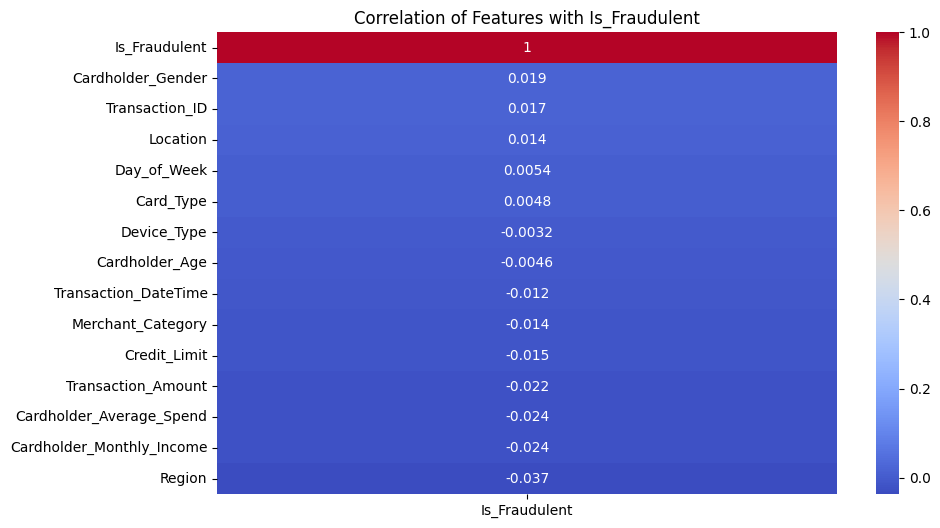

In [ ]:
# Visualize correlation with target
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Is_Fraudulent']].sort_values(by='Is_Fraudulent', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Is_Fraudulent")
plt.show()

b) Identify and remove redundant or irrelevant features that do not contribute significantly to
the prediction task.

In [ ]:
x = df.drop(['Transaction_ID','Transaction_DateTime','Is_Fraudulent'], axis=1)
y = df['Is_Fraudulent']

## **5) Split data into training and testing:**


a) Divide the dataset into training and testing sets to evaluate the model's performance.


In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


b) Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent
transactions to avoid data leakage.

In [ ]:
# Distribution of fraudulent and non-fraudulent
print("Full dataset distribution:")
print(y.value_counts(normalize=True))
print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set distribution:")
print(y_test.value_counts(normalize=True))

Full dataset distribution:
Is_Fraudulent
0    0.734283
1    0.265717
Name: proportion, dtype: float64

Training set distribution:
Is_Fraudulent
0    0.734346
1    0.265654
Name: proportion, dtype: float64

Testing set distribution:
Is_Fraudulent
0    0.734031
1    0.265969
Name: proportion, dtype: float64


## **6) Feature Scaling:**


a) Scale numerical features to ensure that they have the same magnitude, preventing some
features from dominating others during model training.

In [ ]:
# Use standardization method for feature scaling
from sklearn.preprocessing import StandardScaler
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

b) Common scaling techniques include Min-Max scaling or Standardization (Z-score
normalization).

In [ ]:
# Use MinMaxScaler method for feature scaling - It give better performance to model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])


##**7) Build the Machine Learning Model:**


a) Import the necessary modules and libraries for building and evaluating machine learning
models.


In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive
Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the
accuracy score and F1-score for each classifier.


In [ ]:
# All Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [ ]:
# Evaluate each classifier
results = []
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name,"Accuracy": round(acc, 4),"F1-Score": round(f1, 4)})

In [ ]:
# Create result DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print(results_df)

                    Model  Accuracy  F1-Score
2           Decision Tree    0.5990    0.2787
4     K-Nearest Neighbors    0.6670    0.1587
3           Random Forest    0.7319    0.0154
0     Logistic Regression    0.7340    0.0000
1             Naive Bayes    0.7340    0.0000
5  Support Vector Machine    0.7340    0.0000


c) Select a machine learning algorithm for binary classification with the highest accuracy or
F1-score from the above step.


In [ ]:
# Select Best Model
best_model = DecisionTreeClassifier()
best_model.fit(x_train, y_train)

DecisionTreeClassifier()

d) Train the selected model using the training dataset and evaluate its performance using
appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.


In [ ]:
# Evaluate Training Data
from sklearn.metrics import precision_score, recall_score
y_pred_train = best_model.predict(x_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[2803    0]
 [   0 1014]]


e) Validate the model's performance on the testing dataset and interpret the results to assess
its effectiveness in detecting fraudulent transactions.

In [ ]:
# Evaluate Testing Set
y_pred_test = best_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.6209424083769634
Precision: 0.29850746268656714
Recall: 0.31496062992125984
F1 Score: 0.3065134099616858

Confusion Matrix:
 [[513 188]
 [174  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       701
           1       0.30      0.31      0.31       254

    accuracy                           0.62       955
   macro avg       0.52      0.52      0.52       955
weighted avg       0.63      0.62      0.62       955



# **Conclusion**
The project successfully built a machine learning-based system for Credit Card Fraud Detection, with the Decision Tree Classifier delivering the best results. It combined accuracy, interpretability, and robustness in detecting fraudulent transactions.